In [1]:
import sys
sys.path.append("C:\\Users\\KlimovaAnnaA\\Documents\\MyFiles\\Projects\\OCP")
from Imports import * 

In [2]:
# data = export_from_RISKCUSTOM('select table_name from ALL_TABLES')
# data = export_from_WHWEEK('select table_name from ALL_TABLES')

In [3]:
str = 'API8, ICI4, API2, NEWC'
str_list = str.split(', ')
str_query = '|'.join(str_list)
str_query

'API8|ICI4|API2|NEWC'

In [105]:
table = 'XXMR_MADAB_COMMODITIES'
db = 'RISKACCESS'
years = 5
query = f"""
select distinct * from "{db}"."{table}"
fetch first 3 rows only
"""
data = export_from_RISKCUSTOM(query)
data.head(2)
data.columns

C:\Users\KlimovaAnnaA\Documents\MyFiles\Projects\OCP\Defs.py:99: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_export = pd.read_sql(query, con=connection)


Index(['ID', 'CODE', 'DESCRIPTION', 'PRODUCT_CATEGORY', 'PRODUCT_GROUP',
       'PRODUCT_BRIEF_NAME', 'PRODUCT_NAME', 'REGION',
       'COMMODITY_CODE_LOCATION', 'GEOPOINT', 'INDENTIFYING_ATTRIBUTE',
       'NON_INDENTIFYING_ATTRIBUTE', 'PRICE_SOURCE', 'INFO_SOURCE',
       'INCOTERMS', 'QUOTATION', 'UNIT', 'CURRENCY_1', 'CURRENCY_2',
       'MULTIPLIER', 'CALENDAR_1', 'CALENDAR_2', 'FORWARD_BY', 'VALID_FROM',
       'VALID_TO', 'UUID'],
      dtype='object')

In [108]:
data.FORWARD_BY.unique()
data

,ID,CODE,DESCRIPTION,PRODUCT_CATEGORY,PRODUCT_GROUP,PRODUCT_BRIEF_NAME,PRODUCT_NAME,REGION,COMMODITY_CODE_LOCATION,GEOPOINT,...,UNIT,CURRENCY_1,CURRENCY_2,MULTIPLIER,CALENDAR_1,CALENDAR_2,FORWARD_BY,VALID_FROM,VALID_TO,UUID
0,109,AS China,Market AS China FOB A Spot Weekly USD/mt,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS,Asia&Pacific,China,n/a,...,mt,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS China/Market/ICIS/FOB/A Spot Weekly/USD/mt/S
1,110,AS Europe,Market AS Europe FOB A Spot Weekly USD/mt,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS,Europe,Europe,n/a,...,mt,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS Europe/Market/ICIS/FOB/A Spot Weekly/USD/mt/S
2,111,AS G Brazil,Argus AS G Brazil CFR A Spot Weekly USD/mt,Fertilizer,Nitrogen Fertilizers,Ammonium Sulphate,AS G,Latin America,Brazil,n/a,...,mt,USD,None,None,None,None,S,1900-01-01,4000-01-01 00:00:00,AS G Brazil/Argus/Argus/CFR/A Spot Weekly/USD/...


In [125]:
table = 'XXMR_MADAB_COMMODITIES'
db = 'RISKACCESS'
years = 5
query = f"""
select distinct ID, DESCRIPTION, QUOTATION, FORWARD_BY from "{db}"."{table}"

where QUOTATION = 'A' 
and (regexp_like(DESCRIPTION,'{str_query}') 
or regexp_like(CODE,'{str_query}')
or regexp_like(PRODUCT_NAME,'{str_query}') 
or regexp_like(UUID,'{str_query}')) 
and FORWARD_BY = 'D7MON'



--and VALID_FROM >= ADD_MONTHS(SYSDATE, -{12*years})
--fetch first 3 rows only
"""
data = export_from_RISKCUSTOM(query)

C:\Users\KlimovaAnnaA\Documents\MyFiles\Projects\OCP\Defs.py:99: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_export = pd.read_sql(query, con=connection)


In [126]:
data

,ID,DESCRIPTION,QUOTATION,FORWARD_BY
0,16285,GC NEWC Australia Newcastle D7MON index FOB US...,A,D7MON
1,10231,API2 ARA D7MON index CFR A USD mt Argus,A,D7MON
2,10241,API8 China South D7MON index CFR A USD mt Argus,A,D7MON
3,10288,ICI4 Indonesia D7MON index FOB A USD mt Argus,A,D7MON


In [127]:
# dict of id to product name
coal_dict = {}
for coal in str_list:
    id_list = data.loc[data.DESCRIPTION.str.contains(coal), 'ID'].values.tolist()
    id_dict = {y:x for x,y in zip([coal for i in range(len(id_list))],id_list)}
    coal_dict.update(id_dict)
# list of ids to sql query
id_list = data['ID'].values.tolist()
sql_id_list = str(id_list)[1:-1]
assert len(id_list) == len(coal_dict.keys())
assert len(id_list) == data.shape[0]
id_list

[16285, 10231, 10241, 10288]

In [128]:
table = 'XXMR_MADAB_CONTENT'
db = 'RISKACCESS'
years = 5
query = f"""
select * from "{db}"."{table}"

where COMMODITY_ID in ({sql_id_list})
--or regexp_like(CODE,'{str_query}')
--or regexp_like(PRODUCT_NAME,'{str_query}') 
--or regexp_like(UUID,'{str_query}') 

and PERIOD >= ADD_MONTHS(SYSDATE, -{12*years})
--fetch first 3 rows only
"""
data_export = export_from_RISKCUSTOM(query)
data_export.head()

C:\Users\KlimovaAnnaA\Documents\MyFiles\Projects\OCP\Defs.py:99: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_export = pd.read_sql(query, con=connection)


,ID,INSERTED_AT,COMMODITY_ID,NAME,VALUE_QUALIFIER,PUBLICATION_DATE,PERIOD_FROM,PERIOD_TO,PERIOD,PROPOGATE_ID,ENTITY,VALUE1,VALUE2,SOURCE_ID,STATUS,PERMISSION,APPROVED_BY,APPROVED_AT
0,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,2022-04-04,2022-04-10,2022-04-04,1299491735,0,305.6,None,14703,P,None,None,None
1,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,NaT,NaT,2022-04-05,1299491735,0,305.6,None,14703,P,None,None,None
2,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,NaT,NaT,2022-04-06,1299491735,0,305.6,None,14703,P,None,None,None
3,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,NaT,NaT,2022-04-07,1299491735,0,305.6,None,14703,P,None,None,None
4,None,2023-03-25 08:23:49,10231,average,average,2022-04-08,NaT,NaT,2022-04-08,1299491735,0,305.6,None,14703,P,None,None,None


In [129]:
data_export.shape
# data_export[data_export.VALUE1.isna()]
# data_export[data_export.duplicated()]

(3423, 18)

In [151]:
data_export['Coal'] = data_export['COMMODITY_ID'].replace(coal_dict)
data_export.Coal.unique()
data_export = data_export.sort_values(['Coal', 'PERIOD'])

data_export['rolling_mean'] = data_export.groupby('Coal')['VALUE1'].transform(lambda x: x.rolling(2*7, min_periods=1).mean())

C:\Users\KlimovaAnnaA\AppData\Local\Temp\ipykernel_9836\224413387.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
C:\Users\KlimovaAnnaA\AppData\Local\Temp\ipykernel_9836\224413387.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
C:\Users\KlimovaAnnaA\AppData\Local\Temp\ipykernel_9836\224413387.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=30)
C:\Users\KlimovaAnnaA\AppData\Local\Temp\ipykernel_9836\224413387.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklab

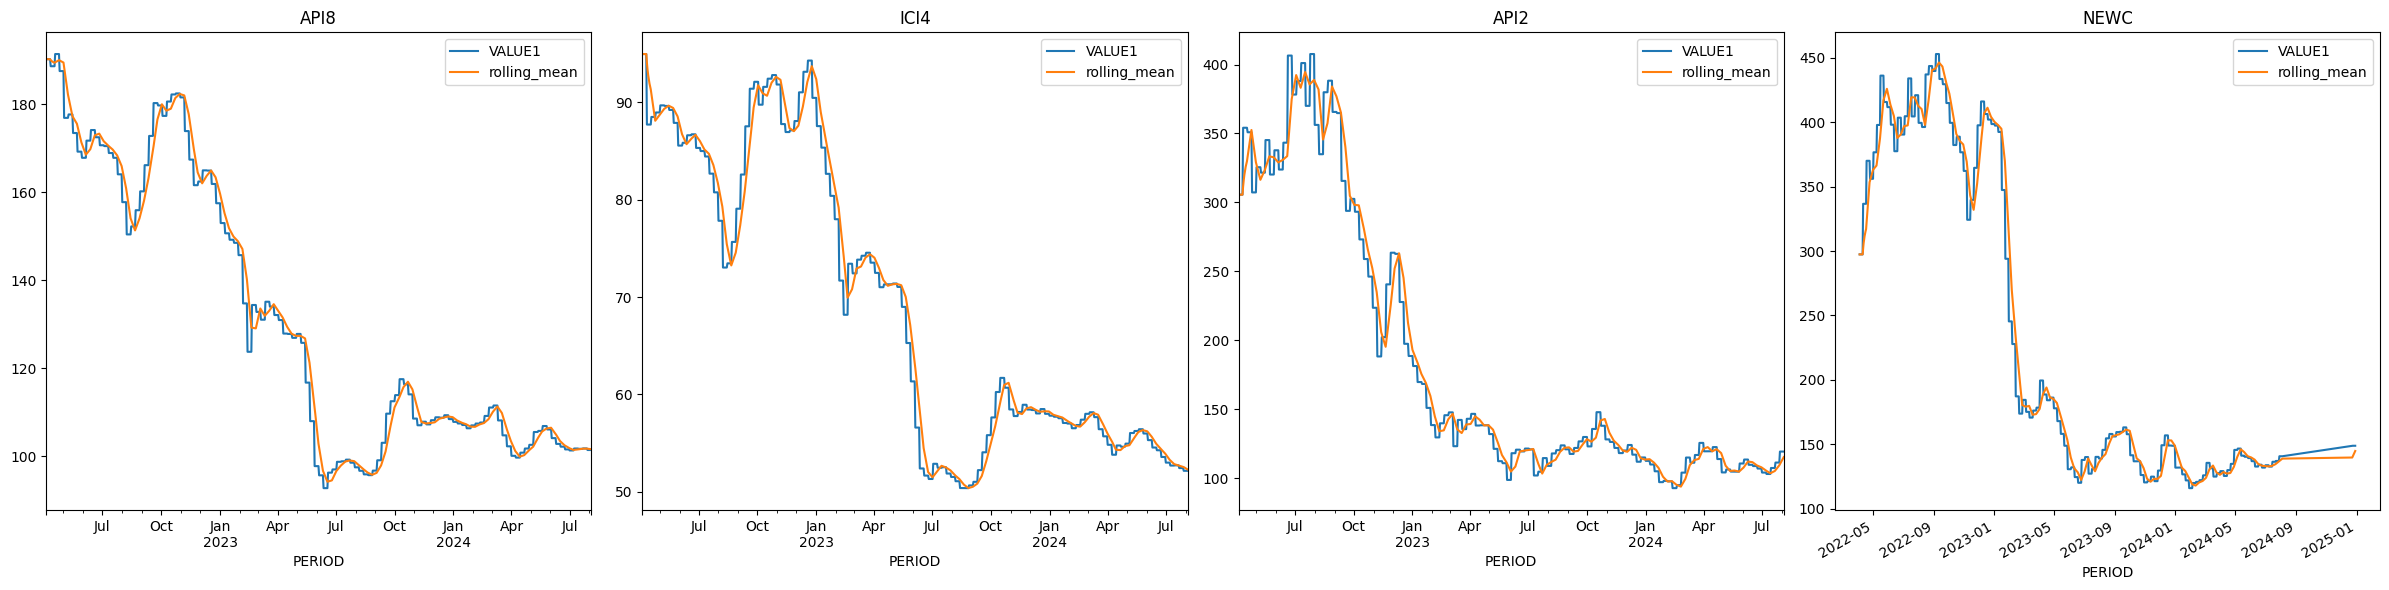

In [152]:
# data_plt = data.head(20)
fig, axes = plt.subplots(ncols=len(str_list), figsize=(24,6))
counter = 0
for coal in str_list:
    data_coal = data_export[data_export.Coal == coal]
    data_coal.plot(x='PERIOD', y=['VALUE1','rolling_mean'], ax=axes[counter])
    # g = sns.lineplot(data_coal, x='PERIOD', y=['VALUE1','rolling_mean'], ax=axes[counter])
    axes[counter].set_title(coal)
    counter+=1
    g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.tight_layout()
# plt.show()

In [207]:
data_coal_corr = data_export.pivot_table(index='PERIOD', columns='Coal', values='VALUE1', aggfunc='sum').reset_index().sort_values('PERIOD')
# data_coal_corr[(data_coal_corr==1).all(axis=1)]
# data_coal_corr.plot(x='PERIOD', y='API2')
data_coal_corr[(data_coal_corr.isna()).all(axis=1)]
data_coal_corr = data_coal_corr.dropna()

<Axes: xlabel='Coal', ylabel='Coal'>

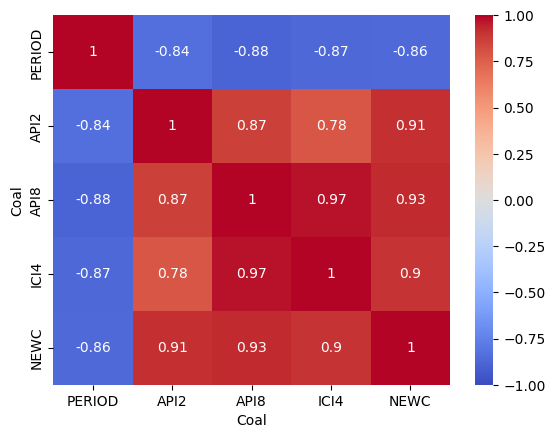

In [192]:
sns.heatmap(data_coal_corr.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
# sns.scatterplot()

<Axes: xlabel='PERIOD'>

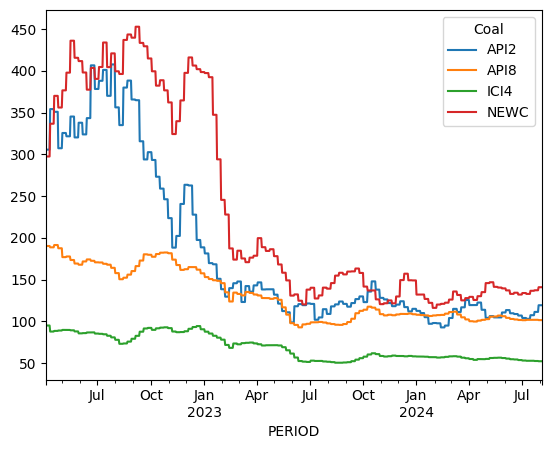

In [204]:
data_coal_corr.plot(y = data_coal_corr.columns[1:].tolist(), x='PERIOD')



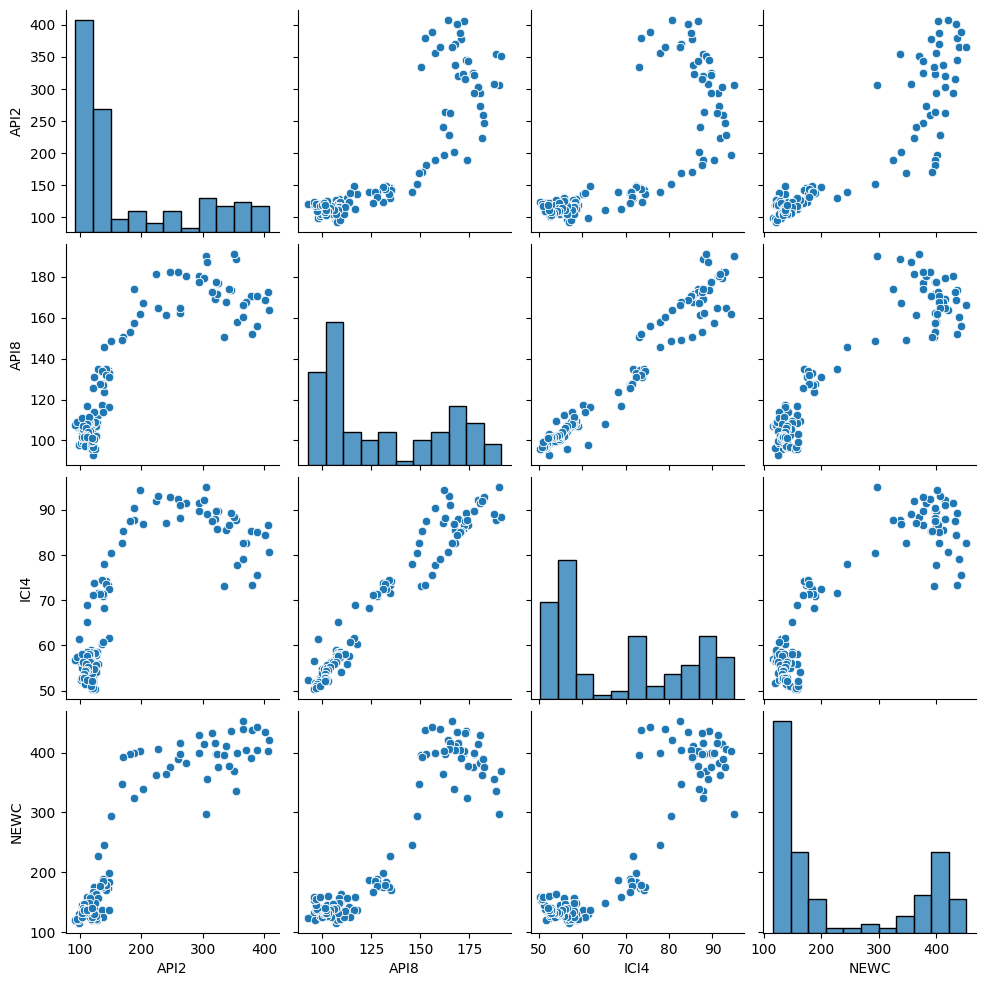

In [208]:
sns.pairplot(data_coal_corr)

In [221]:
# вынести обозначение периодов
data_coal_corr['year'] = data_coal_corr.PERIOD.dt.year
data_coal_corr
sns.catplot('PERIOD', np.ln(data_coal_corr.iloc[:,1:-2]), 'year', kind='box', )

TypeError: catplot() takes from 0 to 1 positional arguments but 3 positional arguments (and 1 keyword-only argument) were given